# Data Understanding

# Import library

In [1]:
# load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
# read csv file into dataframe with first column as index
df_campaigns = pd.read_csv('data/marketing_campaign_data.csv', index_col=0)
# print first five rows
df_campaigns.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# view attributus and datatypes
df_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Description:
- ID : Customer's id
- Year_Birth : Customer's year of birth
- Education : Customer’s level of education
- Marital_Status : Customer’s marital status
- Income : Customer’s yearly household income
- Kidhome : Number of small children in customer’s household
- Teenhome : Number of teenagers in customer’s household
- Dt_Customer : Date of customer’s enrolment with the company
- Recency : Number of days since the last purchase
- MntCoke : Amount spent on coke products in the last 2 years
- MntFruits : Amount spent on fruits products in the last 2 years
- MntMeatProducts : Amount spent on meat products in the last 2 years
- MntFishProducts : Amount spent on fish products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntGoldProds : Amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumWebPurchases : Number of purchases made through company’s web site
- NumCatalogPurchases : Number of purchases made using catalogue
- NumStorePurchases : Number of purchases made directly in stores
- NumWebVisitsMonth : Number of purchases made through company’s web site
- AcceptedCmp3 : 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1 : 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 : 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Complain : 1 if customer complained in the last 2 years
- Z_CostContact : Cost to contact a customer
- Z_Revenue : Revenue after client accepting campaign
- Response : 1 if customer accepted the offer in the last campaign, 0 otherwise

In [4]:
df_campaigns.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Descriptive Statistics

In [5]:
num_cols = df_campaigns.select_dtypes(exclude='object').columns.tolist()
cat_cols = df_campaigns.select_dtypes(include='object').columns.tolist()

print('Total numerical columns :', len(num_cols))
print('Total categorical columns :', len(cat_cols))

Total numerical columns : 26
Total categorical columns : 3


In [6]:
df_campaigns[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


In [7]:
df_campaigns[cat_cols].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


# Feature Engineering

In [8]:
df_campaigns['Age'] = 2022 - df_campaigns['Year_Birth']
df_campaigns['Children'] = df_campaigns['Kidhome'] + df_campaigns['Teenhome']
df_campaigns['TotalSpending'] = df_campaigns.filter(regex='Mnt', axis=1).sum(axis=1)
df_campaigns['NumOfTransactions'] = df_campaigns.filter(regex='Purchase', axis=1).sum(axis=1)
df_campaigns['NumOfAcceptedCmp'] = df_campaigns.filter(regex='Cmp', axis=1).sum(axis=1)
df_campaigns['CVR'] = np.where(df_campaigns['NumWebVisitsMonth']>0,
                               df_campaigns['Response']/df_campaigns['NumWebVisitsMonth'], 0.0)

In [9]:
df_campaigns.iloc[:5, -6:]

,Age,Children,TotalSpending,NumOfTransactions,NumOfAcceptedCmp,CVR
0,65,0,1617000,25,0,0.142857
1,68,2,27000,6,0,0.000000
2,57,0,776000,21,0,0.000000
3,38,1,53000,8,0,0.000000
4,41,1,422000,19,0,0.000000


# Exploratory Data Analysis

In [10]:
df_eda = df_campaigns.copy()

## Bivariate Analysis

### Age with CVR

Customer's Age start from 26 to 129


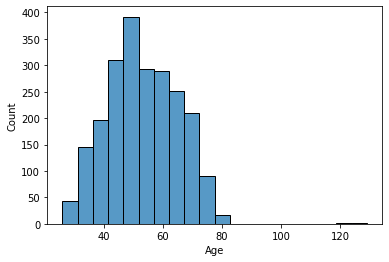

In [11]:
print(f"Customer's Age start from {df_eda['Age'].min()} to {df_eda['Age'].max()}")
sns.histplot(df_eda['Age'], bins=20)
plt.show()

In [12]:
def age_group(x):
    if x <= 30:
        return '20-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    elif x <= 80:
        return '71-80'
    else:
        return '>80'

df_eda['AgeGroup'] = df_eda['Age'].apply(lambda x : age_group(x))
CVR_by_age = df_eda.groupby('AgeGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_age

,AgeGroup,ID,CVR
0,20-30,28,0.111111
1,31-40,318,0.075120
2,41-50,654,0.032680
3,51-60,585,0.032222
4,61-70,473,0.042437
5,71-80,177,0.056957
6,>80,5,0.000000


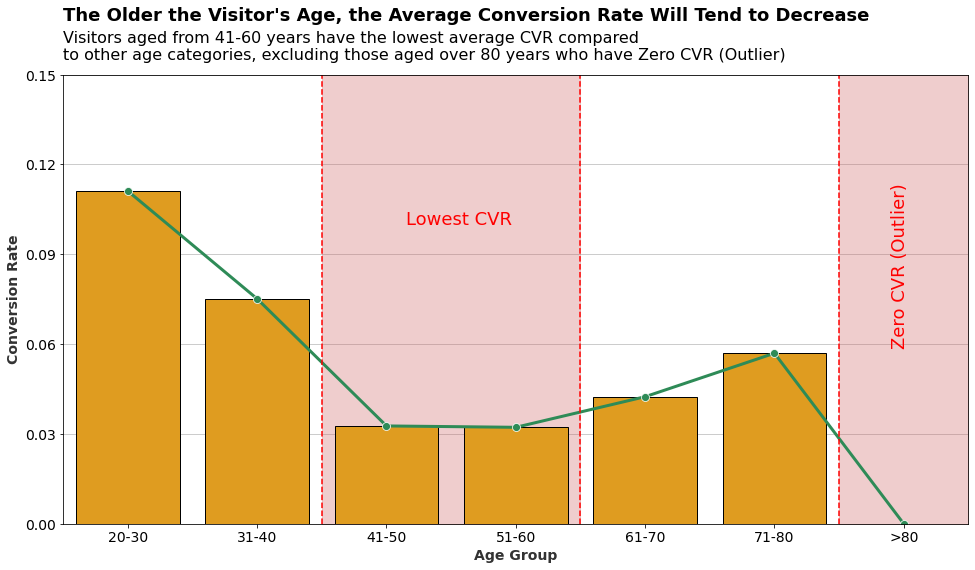

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sns.barplot(data=CVR_by_age, x='AgeGroup', y='CVR', color='orange',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_by_age, x='AgeGroup', y='CVR', color='seagreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Age Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 6.5) # membatasi x-axis
plt.ylim(0, 0.15) # membatasi y-axis
plt.yticks(np.arange(0, 0.16, 0.03))

plt.axvline(1.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(3.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=2.15, y=0.1, s='Lowest CVR', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(1.5, 4, 1), [[0.15]], color='indianred', alpha=0.3)

plt.axvline(5.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=5.9, y=0.06, s='Zero CVR (Outlier)', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(5.5, 7.5, 1), [[0.15]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(s="The Older the Visitor's Age, the Average Conversion Rate Will Tend to Decrease",
         x=-0.5, y=0.168, fontsize=18, fontweight='bold')
plt.text(s="Visitors aged from 41-60 years have the lowest average CVR compared\nto other age categories, excluding those aged over 80 years who have Zero CVR (Outlier)",
         x=-0.5, y=0.155, fontsize=16)

plt.tight_layout()
plt.savefig('img/age_with_cvr.png')
plt.show()

### Income with CVR

Customer's Income start from 1730000.0 to 666666000.0


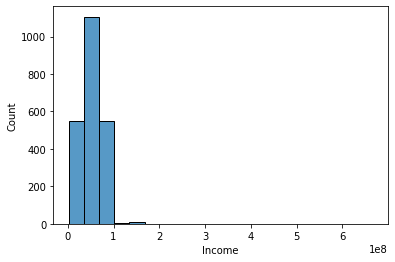

In [14]:
print(f"Customer's Income start from {df_eda['Income'].min()} to {df_eda['Income'].max()}")
sns.histplot(df_eda['Income'], bins=20)
plt.show()

In [15]:
income = np.where(df_eda['Income']>100000000, 110000000, df_eda['Income'])
income_bins = list(np.arange(0, max(income)+10000000, 10000000))
income_labs = ['{}M-{}M'.format(i*10, (i+1)*10) for i in range(10)] + ['>100M']
df_eda['IncomeGroup'] = pd.cut(income, bins=income_bins, labels=income_labs)
CVR_by_income = df_eda.groupby('IncomeGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_income

,IncomeGroup,ID,CVR
0,0M-10M,29,0.011973
1,10M-20M,98,0.014375
2,20M-30M,243,0.013972
3,30M-40M,362,0.017547
4,40M-50M,328,0.016988
5,50M-60M,315,0.013540
6,60M-70M,333,0.028662
7,70M-80M,291,0.073409
8,80M-90M,164,0.189956
9,90M-100M,40,0.284821


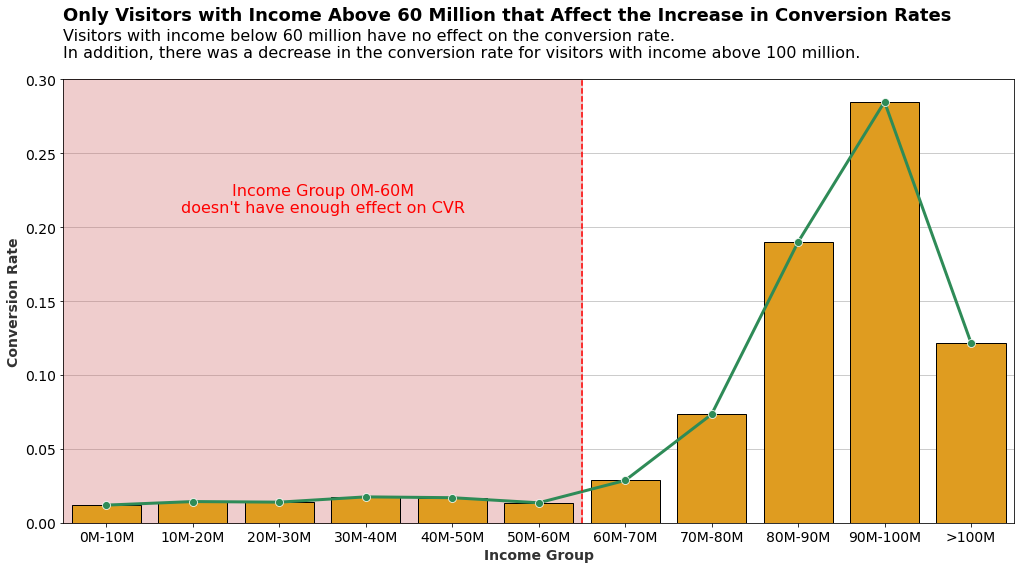

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.barplot(data=CVR_by_income, x='IncomeGroup', y='CVR', color='orange',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_by_income, x='IncomeGroup', y='CVR', color='seagreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Income Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 10.5) # membatasi x-axis
plt.ylim(0, 0.3) # membatasi y-axis

plt.axvline(5.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=2.5, y=0.21, s="Income Group 0M-60M\ndoesn't have enough effect on CVR",
         fontsize=16, color='red', ha='center') # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5, 6, 1), [[0.3]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(s="Only Visitors with Income Above 60 Million that Affect the Increase in Conversion Rates",
         x=-0.5, y=0.34, fontsize=18, fontweight='bold')
plt.text(s="Visitors with income below 60 million have no effect on the conversion rate.\nIn addition, there was a decrease in the conversion rate for visitors with income above 100 million.",
         x=-0.5, y=0.315, fontsize=16)

plt.tight_layout()
plt.savefig('img/income_with_cvr.png')
plt.show()

### Children with CVR

In [17]:
CVR_by_children = df_eda.groupby('Children', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_children

,Children,ID,CVR
0,0,638,0.114525
1,1,1128,0.015387
2,2,421,0.015836
3,3,53,0.005391


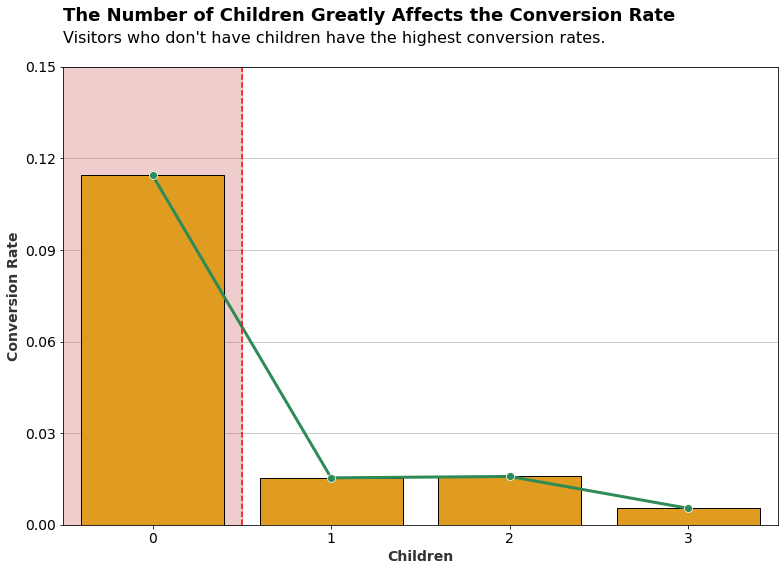

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(11,8))
sns.barplot(data=CVR_by_children, x='Children', y='CVR', color='orange',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_by_children, x='Children', y='CVR', color='seagreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Children', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 3.5) # membatasi x-axis
plt.ylim(0, 0.15) # membatasi y-axis
plt.yticks(np.arange(0, 0.16, 0.03))

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.stackplot(np.arange(-0.5, 1, 1), [[0.15]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(s="The Number of Children Greatly Affects the Conversion Rate",
         x=-0.5, y=0.165, fontsize=18, fontweight='bold')
plt.text(s="Visitors who don't have children have the highest conversion rates.",
         x=-0.5, y=0.158, fontsize=16)

plt.tight_layout()
plt.savefig('img/children_with_cvr.png')
plt.show()

### Total Spending with CVR

Customer's Total Spending start from 5000 to 2525000


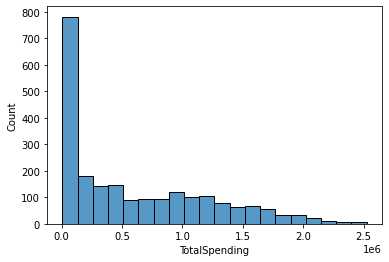

In [19]:
print(f"Customer's Total Spending start from {df_eda['TotalSpending'].min()} to {df_eda['TotalSpending'].max()}")
sns.histplot(df_eda['TotalSpending'], bins=20)
plt.show()

In [20]:
def spending_group(x):
    if x <= 500000:
        return '0-0.5M'
    elif x <= 1000000:
        return '0.5M-1M'
    elif x <= 1500000:
        return '1M-1.5M'
    elif x <= 2000000:
        return '1.5M-2M'
    elif x <= 2500000:
        return '2M-2.5M'
    else:
        return '>2.5M'

df_eda['SpendingGroup'] = df_eda['TotalSpending'].apply(lambda x : spending_group(x))
CVR_by_spending = df_eda.groupby('SpendingGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_spending = CVR_by_spending.sort_values('ID', ascending=False)
CVR_by_spending

,SpendingGroup,ID,CVR
0,0-0.5M,1246,0.013765
1,0.5M-1M,392,0.023421
3,1M-1.5M,356,0.076065
2,1.5M-2M,196,0.167379
4,2M-2.5M,47,0.210816
5,>2.5M,3,0.416667


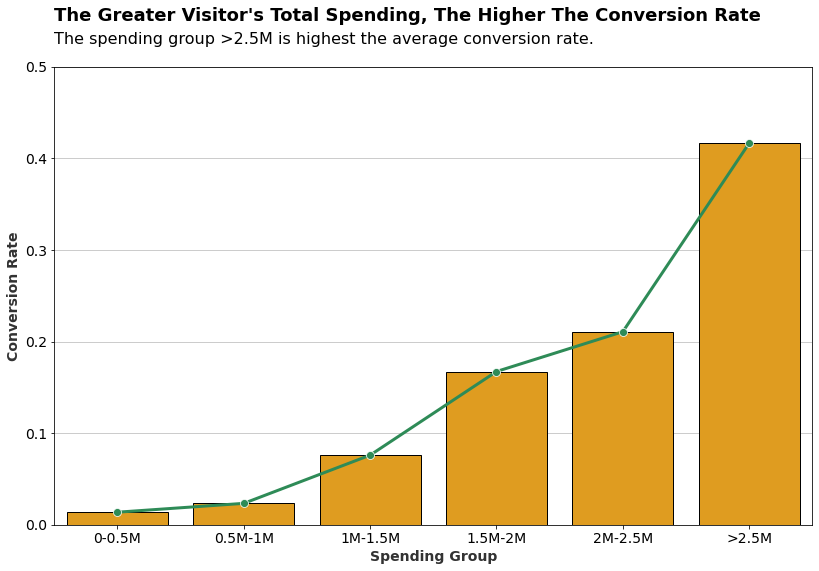

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=CVR_by_spending, x='SpendingGroup', y='CVR', color='orange',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_by_spending, x='SpendingGroup', y='CVR', color='seagreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Spending Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 5.5) # membatasi x-axis
plt.ylim(0, 0.5) # membatasi y-axis
plt.yticks(np.arange(0, 0.55, 0.1))

# plt.axvline(2.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
# plt.axvline(3.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
# plt.text(x=2.65, y=0.35, s='Down by Half', fontsize=14, color='red') # menambahkan teks keterangan
# plt.stackplot(np.arange(2.5, 4, 1), [[0.5]], color='indianred', alpha=0.3)

plt.text(s="The Greater Visitor's Total Spending, The Higher The Conversion Rate",
         x=-0.5, y=0.55, fontsize=18, fontweight='bold')
plt.text(s="The spending group >2.5M is highest the average conversion rate.",
         x=-0.5, y=0.525, fontsize=16)

plt.tight_layout()
plt.savefig('img/spending_with_cvr.png')
plt.show()

### Total Transaction with CVR

Customer's Total Transaction start from 0 to 44


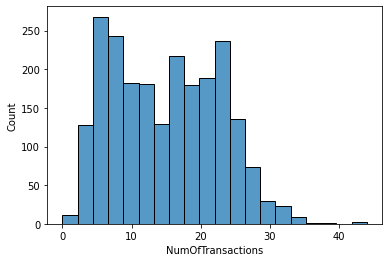

In [22]:
print(f"Customer's Total Transaction start from {df_eda['NumOfTransactions'].min()} to {df_eda['NumOfTransactions'].max()}")
sns.histplot(df_eda['NumOfTransactions'], bins=20)
plt.show()

In [23]:
def transactions_group(x):
    if x <= 10:
        return '0-10'
    elif x <= 20:
        return '10-20'
    elif x <= 30:
        return '20-30'
    elif x <= 40:
        return '30-40'
    else:
        return '>40'

df_eda['TransactionGroup'] = df_eda['NumOfTransactions'].apply(lambda x : transactions_group(x))
CVR_by_trx = df_eda.groupby('TransactionGroup', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_trx

,TransactionGroup,ID,CVR
0,0-10,832,0.010970
1,10-20,801,0.060473
2,20-30,571,0.068024
3,30-40,34,0.028466
4,>40,2,0.000000


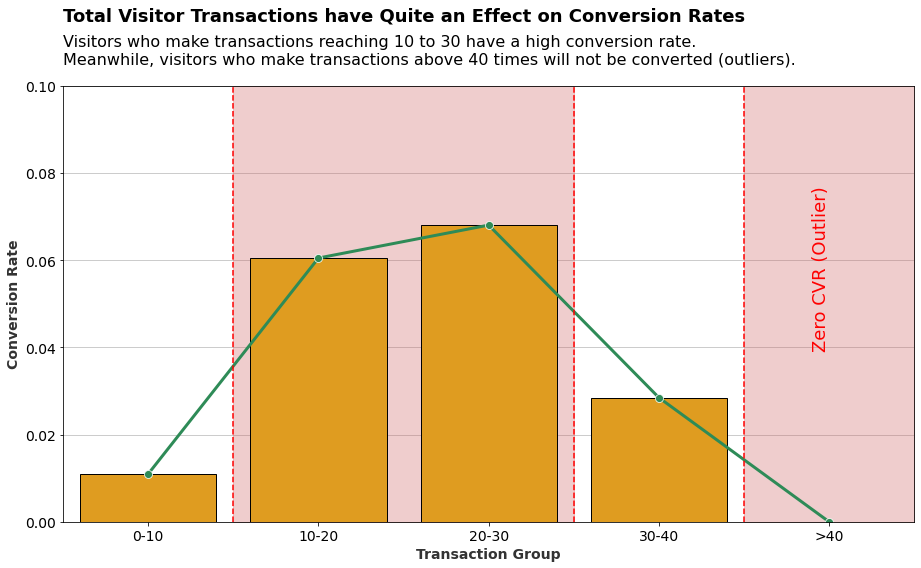

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(13,8))
sns.barplot(data=CVR_by_trx, x='TransactionGroup', y='CVR', color='orange',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_by_trx, x='TransactionGroup', y='CVR', color='seagreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Transaction Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 4.5) # membatasi x-axis
plt.ylim(0, 0.1) # membatasi y-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(2.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.stackplot(np.arange(0.5, 3, 1), [[0.1]], color='indianred', alpha=0.3)

plt.axvline(3.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=3.9, y=0.04, s='Zero CVR (Outlier)', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(3.5, 5, 1), [[0.1]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(s="Total Visitor Transactions have Quite an Effect on Conversion Rates",
         x=-0.5, y=0.115, fontsize=18, fontweight='bold')
plt.text(s="Visitors who make transactions reaching 10 to 30 have a high conversion rate.\nMeanwhile, visitors who make transactions above 40 times will not be converted (outliers).",
         x=-0.5, y=0.105, fontsize=16)

plt.tight_layout()
plt.savefig('img/transactions_with_cvr.png')
plt.show()

### Total Accepted Campaign with CVR

In [25]:
CVR_by_acceptedcmp = df_eda.groupby('NumOfAcceptedCmp', as_index=False).agg({'ID': 'count', 'CVR': 'mean'})
CVR_by_acceptedcmp

,NumOfAcceptedCmp,ID,CVR
0,0,1777,0.020019
1,1,325,0.083618
2,2,83,0.203285
3,3,44,0.311833
4,4,11,0.366667


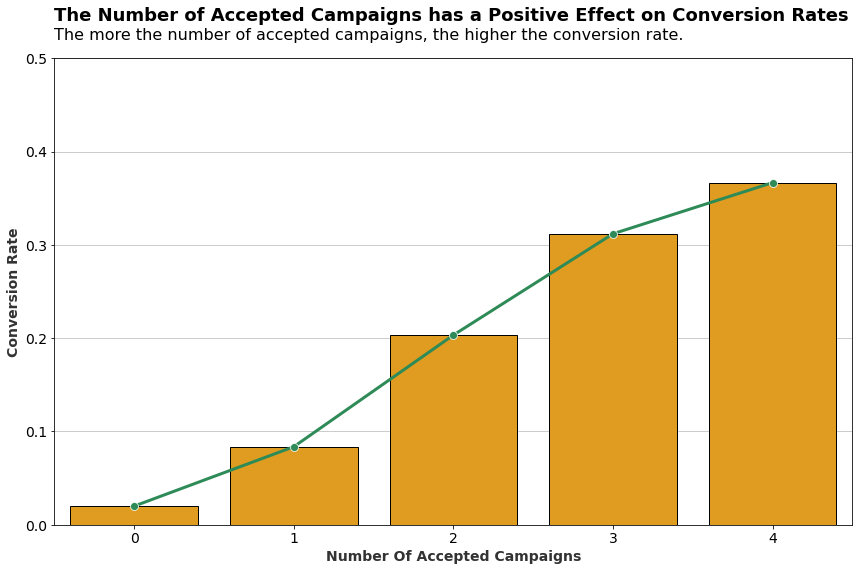

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(13,8))
sns.barplot(data=CVR_by_acceptedcmp, x='NumOfAcceptedCmp', y='CVR', color='orange',
            edgecolor='black', ax=ax)
sns.lineplot(data=CVR_by_acceptedcmp, x='NumOfAcceptedCmp', y='CVR', color='seagreen',
             marker='o', markersize=8, linewidth=3, ax=ax)

ax.set_xlabel('Number Of Accepted Campaigns', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 4.5) # membatasi x-axis
plt.ylim(0, 0.5) # membatasi y-axis

plt.text(s="The Number of Accepted Campaigns has a Positive Effect on Conversion Rates",
         x=-0.5, y=0.54, fontsize=18, fontweight='bold')
plt.text(s="The more the number of accepted campaigns, the higher the conversion rate.",
         x=-0.5, y=0.52, fontsize=16)

plt.tight_layout()
plt.savefig('img/acceptedcmp_with_cvr.png')
plt.show()

In [27]:
# save csv file for preprocessing
df_eda.to_csv('data/marketing_campaign_preparation.csv', index=False)